# Emotion detection


## importing libraries

In [15]:
import matplotlib.pyplot as plt  # performance graph
from glob import glob  # create list of files present in directory
import cv2  # read images
import random  # choose anything in random
import os

# Conditionally use the magic command if running in a Jupyter Notebook
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except NameError:
    pass  # Not in a Jupyter Notebook

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # to transform data in ml understandable format 
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D  # linear function, decide input size, ml model does not only work on trained data set, changes matrix into one d array, conversational layers to read images and learn future
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D  # does normalization over batch of data, model does not remain only linear, changes dimensions of layers so that as we keep on increasing images data size should not increase much
from tensorflow.keras.models import Model, Sequential  # to create or define model, we will be using sequential model
from tensorflow.keras.optimizers import Adam  # we will use Adam as optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf

print("Tensorflow version: ", tf.__version__)




Tensorflow version:  2.16.1


**exploring datasets

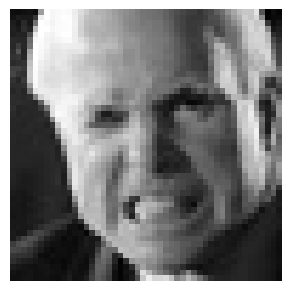

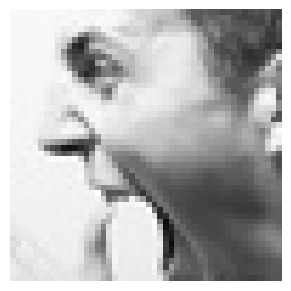

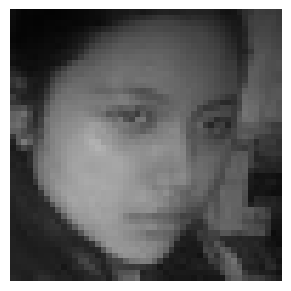

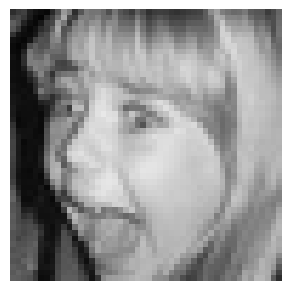

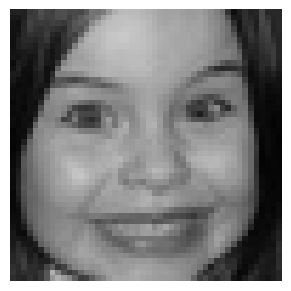

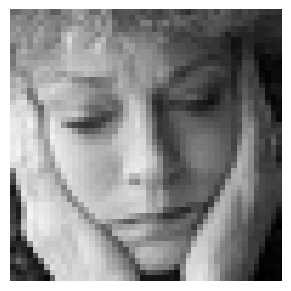

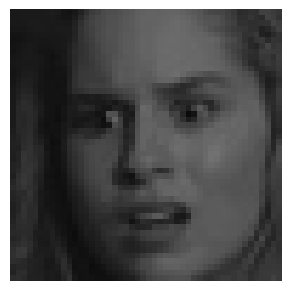

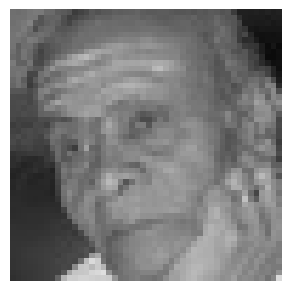

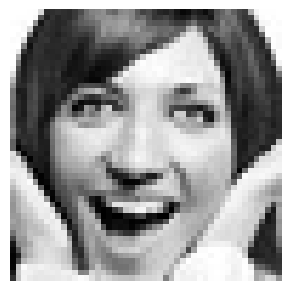

In [16]:
images = glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**preparing data for training**

In [9]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",target_size =(img_size,img_size),color_mode = "grayscale",batch_size = batch_size,class_mode = "categorical",shuffle= True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",target_size =(img_size,img_size),color_mode = "grayscale",batch_size = batch_size,class_mode = "categorical",shuffle= True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**defining model**

In [22]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters,kernel_size = kernel_size,padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    return x


In [23]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    return x
    

In [24]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs],outputs = [output])

    model.compile(loss = ['categorical_crossentropy'],optimizer = 'adam',metrics = ['accuracy'])
    return model

In [25]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

**initialising the model**

In [26]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]


**training the model**

**takes little time to complete**

In [29]:
history = model.fit(
x= train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3633 - loss: 1.6700
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.3634 - loss: 1.6698 - val_accuracy: 0.4125 - val_loss: 1.5484
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6:39 894ms/step - accuracy: 0.4062 - loss: 1.4642
Epoch 2: saving model to model_weights.weights.h5


C:\Users\HP_PC\anaconda3\envs\emotion_detection_course\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 1.4642 - val_accuracy: 0.3000 - val_loss: 1.6500
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4969 - loss: 1.3277
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 553s 1s/step - accuracy: 0.4969 - loss: 1.3277 - val_accuracy: 0.4205 - val_loss: 1.4835
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6:29 872ms/step - accuracy: 0.5156 - loss: 1.1857
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5156 - loss: 1.1857 - val_accuracy: 0.5000 - val_loss: 1.2688
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5760 - loss: 1.1478
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 3792s 8s/step - accuracy: 0.5760 - loss: 1.1478 - val_accuracy: 0.3331 - val_loss: 1.7072
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6:40 897ms/step - accuracy: 0.5781 - loss: 1.1557
Epoch 6: saving model to mode

**model evaluation**

In [30]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.4846 - loss: 1.5694


[1.579909324645996, 0.48342156410217285]

**plotting loss**

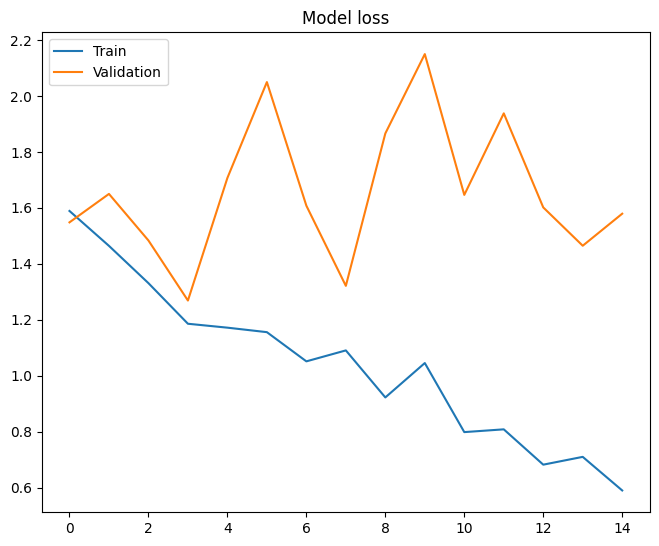

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train','Validation'],loc =  'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right = 0.95,left=0.0,hspace=0.25,wspace=0.35)


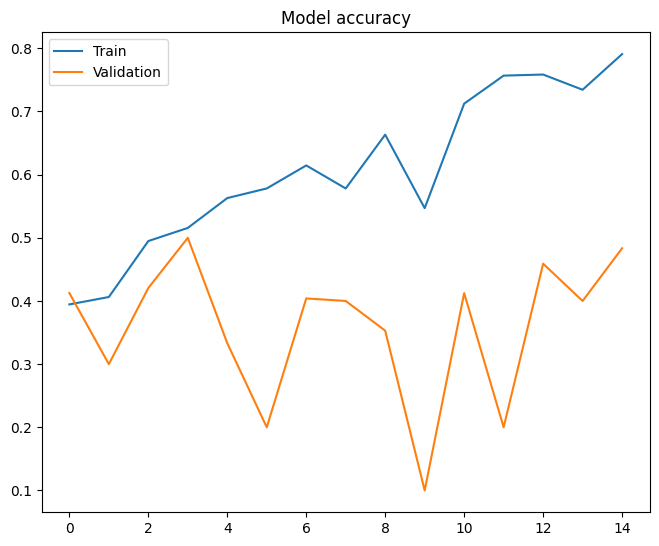

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train','Validation'],loc =  'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right = 0.95,left=0.0,hspace=0.25,wspace=0.35)


**saving model 


In [35]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)